In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

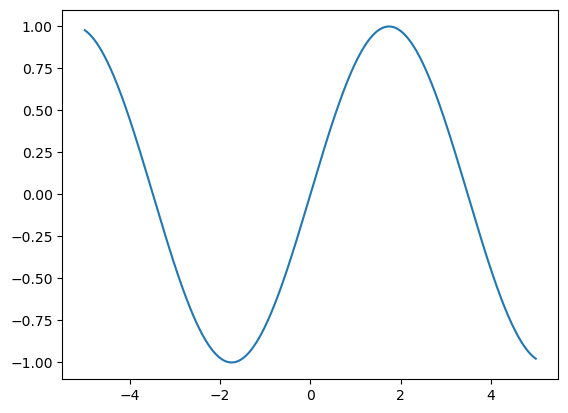

In [4]:
# The true function 
def f(x):
    return np.sin(0.9*x)

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))
plt.show()

In [5]:
def Kernel(a,b,sigma,l):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return sigma*np.exp(-1/(2*l)*(sqrdist))

In [14]:
def GPR(xtest,xtrain,Nobs,sigma,l):
    y = f(xtrain)
    noise = 0.05
    A = Kernel(xtrain,xtrain,sigma,l)+noise**2*np.identity(Nobs)
    Ainv =np.linalg.inv(A)
    fstar = Kernel(xtest,xtrain,sigma,l)@Ainv@y
    varf = Kernel(xtest,xtest,sigma,l)-Kernel(xtest,xtrain,sigma,l)@Ainv@Kernel(xtrain,xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(np.abs(varfxtest))
    return fstar,std

## Just to Observe. Varying the check points

1.0199781406475883
0.43848165135699974
0.8041339142933117
0.8041339142933117
0.43848165135699974
1.0199781406475883


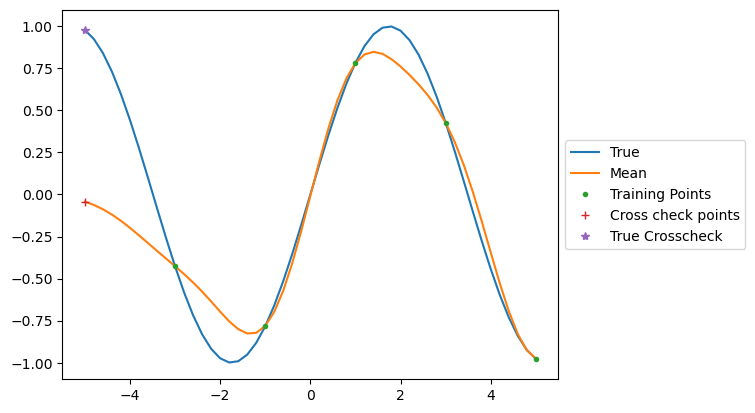

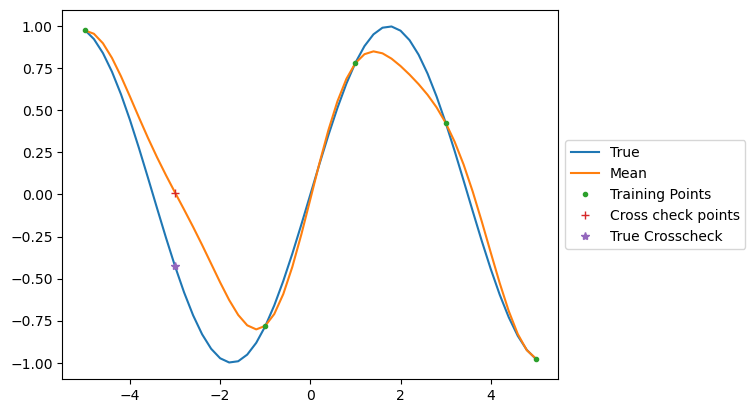

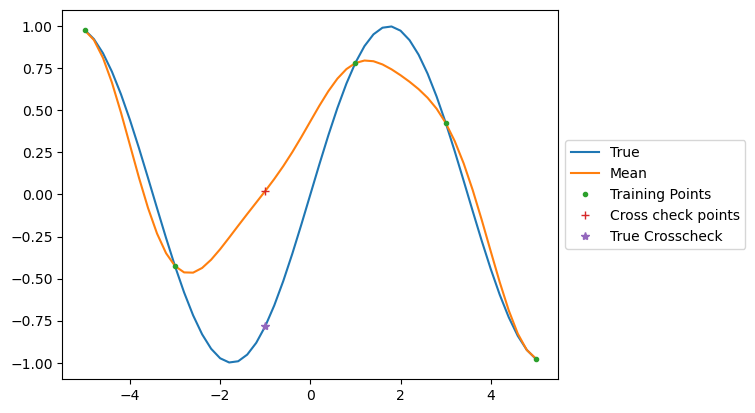

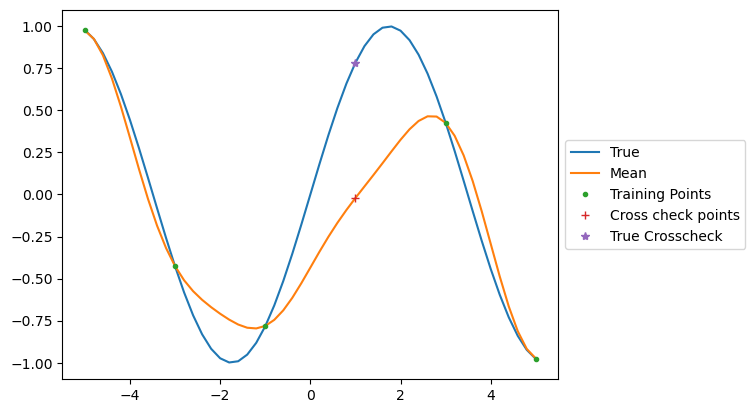

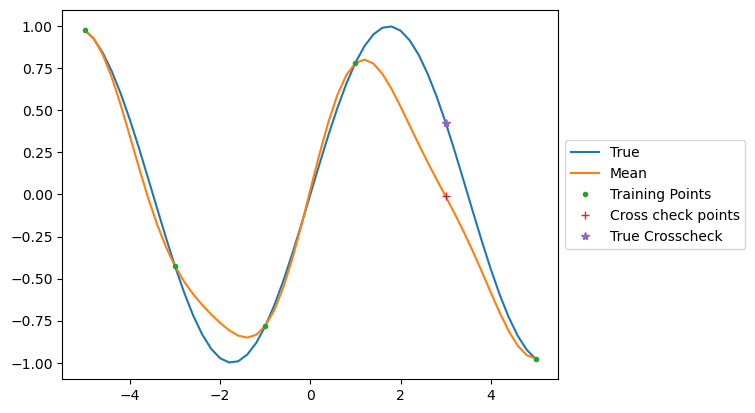

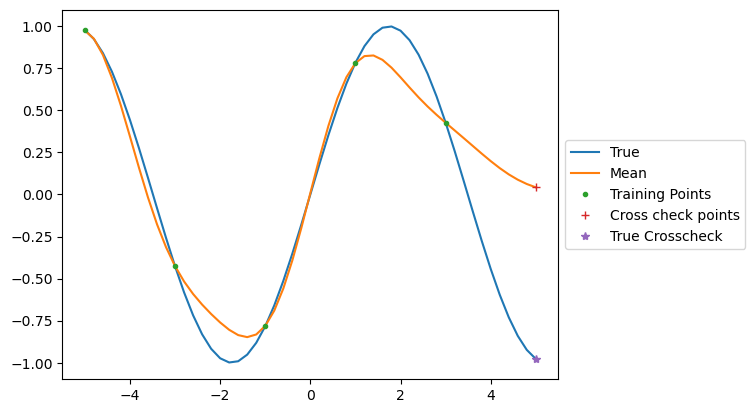

In [17]:
#Ntest = 100
Nobs = 6
n=10
Ncheck = 1
Ntrain = Nobs-Ncheck
i=0
while(i<Nobs):
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = np.linspace(-5,5,Ntest)
    xtest = []
    j=0
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    xcheck = np.array(xinit[i])
    xtrain = np.delete(xinit,i)
    mean,std = GPR(xtest,xtrain,Ntrain,1,1)
    plt.figure()
    plt.plot(xtest,f(xtest),label='True')
    plt.plot(xtest,mean,label = 'Mean')
    plt.plot(xtrain,f(xtrain),'.',label='Training Points')
    num = np.argwhere(xtest == xcheck).item()
    plt.plot(xtest[num],mean[num],'+',label='Cross check points')
    plt.plot(xinit[i],f(xinit[i]),'*',label='True Crosscheck')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    dif = np.abs(mean[num]-f(xcheck))
    print(dif)
    i+=1
#print(dif)

# Initially here I build a minimising L2 routine taking one data point out just as practice.
# Further down I build a routine taking 2 out for cross validation

## Minimising the vertical distance for all check points taken out
## Therefore finding a different optimal hyperperameter l for each point taken out

In [21]:
## This function finds the norm where one point is taken out
## Want to define a function to find the L2 norm at a point. ie removing a certain point
def L2normpoint(param,Nobs,Ncheck,pointindex):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    dif = 0
    j=0
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=pointindex
    xcheck = np.array(xinit[i])
    xtrain = np.delete(xinit,i)
    num = np.argwhere(xtest == xcheck).item()
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = np.abs(mean[num]-f(xcheck))
    return dif

In [23]:
L2normpoint(1,6,1,0)

1.0199781406475883

In [25]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = 1.0 

# FixME use ML algorithm to minimise

Nobs = 10   
Ncheck = 1 
pointindex = np.arange(0,10,1)

for pointindex in pointindex:
    result = minimize(L2normpoint, initial_param, args=(Nobs, Ncheck,pointindex), method="L-BFGS-B")
    l = result.x[0]
    print(f"Index removed = {pointindex}")
    print(f"L for minimised L2 norm = {l}")
    print(f"Resulting L2 norm = {L2normpoint(l,Nobs,Ncheck,pointindex)}\n")

Index removed = 0
L for minimised L2 norm = 4.230073260427983
Resulting L2 norm = 4.027542743756385e-10

Index removed = 1
L for minimised L2 norm = 2.253575525551826
Resulting L2 norm = 8.572137444318173e-11

Index removed = 2
L for minimised L2 norm = 1.9280200756817627
Resulting L2 norm = 0.007714401288434702

Index removed = 3
L for minimised L2 norm = 3.479990665400899
Resulting L2 norm = 0.002616853481336112

Index removed = 4
L for minimised L2 norm = 1.9766953563329164
Resulting L2 norm = 0.006567327829608283

Index removed = 5
L for minimised L2 norm = 1.9766916436469402
Resulting L2 norm = 0.006567327818960356

Index removed = 6
L for minimised L2 norm = 3.479927294850338
Resulting L2 norm = 0.002616853669500374

Index removed = 7
L for minimised L2 norm = 1.9280225495624903
Resulting L2 norm = 0.007714401293234974

Index removed = 8
L for minimised L2 norm = 2.253575521421951
Resulting L2 norm = 2.2324414539198756e-10

Index removed = 9
L for minimised L2 norm = 4.2300732637

## Now minimising the total sum of the vertical distance
## Finding the optimal parameter for all points taken out

In [13]:
## This returns the summed distance when all points are removed. 
def L2norm(param,Nobs,Ncheck):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    dif = 0
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=0
    while(i<Nobs):
        xcheck = np.array(xinit[i])
        xtrain = np.delete(xinit,i)
        num = np.argwhere(xtest == xcheck).item()
        ## running GPR on new xtrain without xcheck
        mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
        dif += np.abs(mean[num]-f(xcheck))
        i+=1
    return dif

In [14]:
## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 1 

result = minimize(L2norm, initial_param, args=(Nobs, Ncheck), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2norm(l,Nobs,Ncheck)/Nobs}\n")

L for minimised L2 norm = 4.230073258935616
Resulting L2 norm average = 0.016417912454622163



In [15]:
pointindex = np.arange(0,10,1)

for pointindex in pointindex:
    print(f"Index removed = {pointindex}")
    print(f"Resulting L2 norm = {L2normpoint(l,Nobs,Ncheck,pointindex)}\n")

Index removed = 0
Resulting L2 norm = 5.248059764539903e-10

Index removed = 1
Resulting L2 norm = 0.04910150172676114

Index removed = 2
Resulting L2 norm = 0.026979211210072185

Index removed = 3
Resulting L2 norm = 0.003976302059246484

Index removed = 4
Resulting L2 norm = 0.0020325467522245844

Index removed = 5
Resulting L2 norm = 0.0020325467522506746

Index removed = 6
Resulting L2 norm = 0.003976302059231607

Index removed = 7
Resulting L2 norm = 0.02697921121008362

Index removed = 8
Resulting L2 norm = 0.049101501726746044

Index removed = 9
Resulting L2 norm = 5.247993151158425e-10



In [16]:
def Sanitycheck(param,Nobs,Ncheck,pointindex):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    j=0
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=pointindex
    xcheck = np.array(xinit[i])
    xtrain = np.delete(xinit,i)
    num = np.argwhere(xtest == xcheck).item()
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = np.abs(mean[num]-f(xcheck))
    return xtest,xtrain,xcheck,num,mean,std

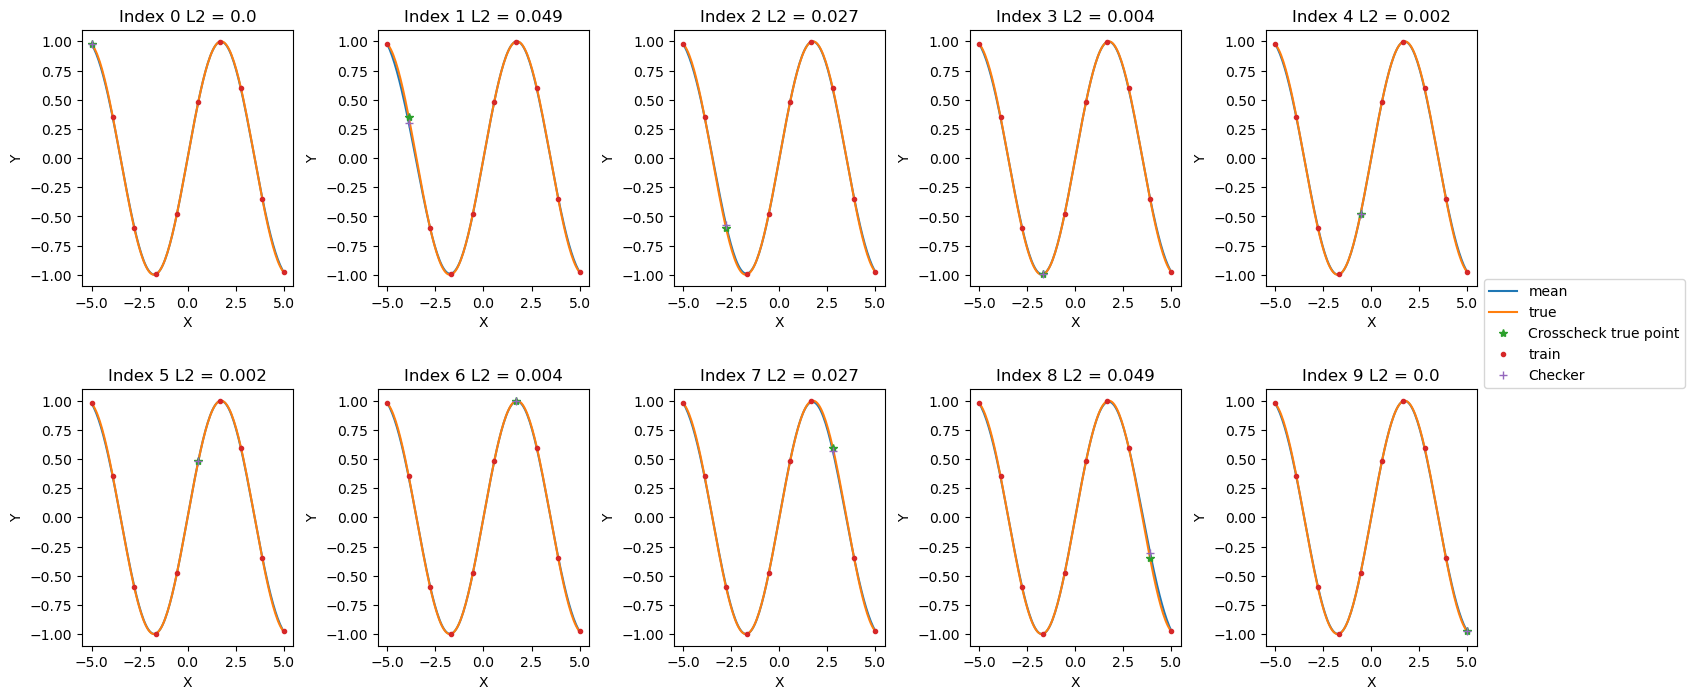

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nobs = 10
Ncheck = 1

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

# Loop over each index and plot in its respective subplot
for index in range(10):
    # Get xtest, xtrain, xcheck, checknum, mean0, std0 from Sanitycheck for the given index
    xtest, xtrain, xcheck, checknum, mean0, std0 = Sanitycheck(l, Nobs, Ncheck, index)

    # Determine subplot position (row, column)
    ax = axes[index // 5, index % 5]
    
    # Plot in the selected subplot
    ax.plot(xtest, mean0, label='mean')
    ax.plot(xtest, f(xtest), label='true')
    ax.plot(xcheck, f(xcheck), '*', label='Crosscheck true point')
    ax.plot(xtrain, f(xtrain), '.', label='train')
    ax.plot(xtest[checknum], mean0[checknum], '+', label='Checker')

    # Set title and labels for each subplot
    ax.set_title(f'Index {index} L2 = {round(L2normpoint(l,Nobs,Ncheck,index),3)}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if (index == 0):
        fig.legend(loc='center left', bbox_to_anchor=(.9, 0.5))

# Move legend to the right outside the plots for a cleaner display
#fig.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()

## Here we observe that we get a large optimal length scale. I think this is because the end point skew the length scale to be large

### Keep the endpoints always and remove the internal points to reduce the optimal length scale

In [20]:
## This returns the summed distance when all points are removed. 
def L2norm(param,Nobs,Ncheck):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    dif = 0
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=1
    while(i<Nobs-1):
        xcheck = np.array(xinit[i])
        xtrain = np.delete(xinit,i)
        num = np.argwhere(xtest == xcheck).item()
        ## running GPR on new xtrain without xcheck
        mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
        dif += np.abs(mean[num]-f(xcheck))
        i+=1
    return dif

In [21]:
## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 1 

result = minimize(L2norm, initial_param, args=(Nobs, Ncheck), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2norm(l,Nobs,Ncheck)/(Nobs-2)}\n")

L for minimised L2 norm = 2.253575527585352
Resulting L2 norm average = 0.00929803219437269



In [22]:
pointindex = np.arange(1,9,1)

for pointindex in pointindex:
    print(f"Index removed = {pointindex}")
    print(f"Resulting L2 norm = {L2normpoint(l,Nobs,Ncheck,pointindex)}\n")

Index removed = 1
Resulting L2 norm = 1.800426474574124e-11

Index removed = 2
Resulting L2 norm = 0.009932597085474892

Index removed = 3
Resulting L2 norm = 0.019646134004246085

Index removed = 4
Resulting L2 norm = 0.007613397669771593

Index removed = 5
Resulting L2 norm = 0.00761339766976904

Index removed = 6
Resulting L2 norm = 0.019646134004245086

Index removed = 7
Resulting L2 norm = 0.009932597085469785

Index removed = 8
Resulting L2 norm = 1.800076754321367e-11



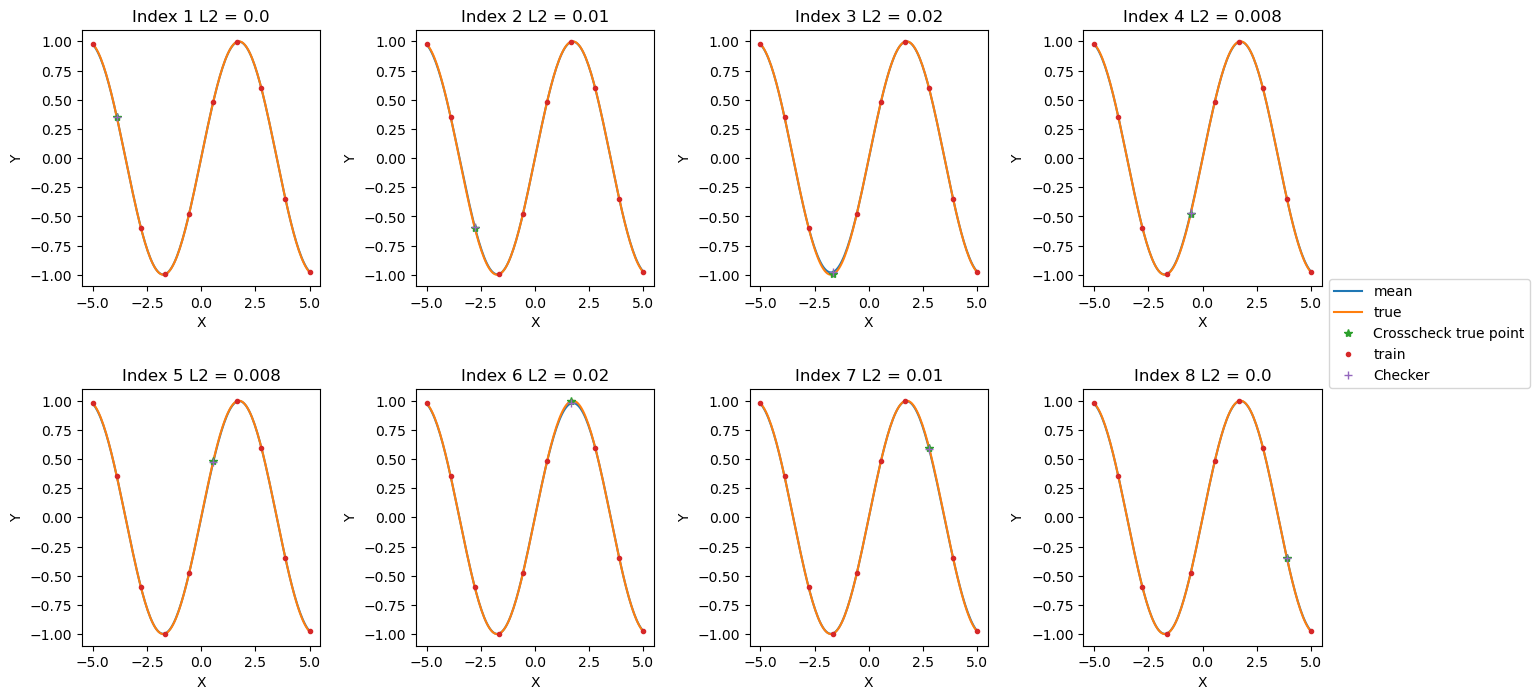

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nobs = 10
Ncheck = 1

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

# Loop over each index from 1 to 8
for idx, index in enumerate(range(1, 9)):  # Updated to plot from index 1 to 8
    # Get xtest, xtrain, xcheck, checknum, mean0, std0 from Sanitycheck for the given index
    xtest, xtrain, xcheck, checknum, mean0, std0 = Sanitycheck(l, Nobs, Ncheck, index)

    # Determine subplot position (row, column) based on idx
    ax = axes[idx // 4, idx % 4]

    # Plot in the selected subplot
    ax.plot(xtest, mean0, label='mean')
    ax.plot(xtest, f(xtest), label='true')
    ax.plot(xcheck, f(xcheck), '*', label='Crosscheck true point')
    ax.plot(xtrain, f(xtrain), '.', label='train')
    ax.plot(xtest[checknum], mean0[checknum], '+', label='Checker')

    # Set title and labels for each subplot
    ax.set_title(f'Index {index} L2 = {round(L2normpoint(l, Nobs, Ncheck, index), 3)}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if (index ==1):
        fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))

# Add a single legend outside of the plots to the right

plt.show()


## Now trying to do this with taking two points out as cross check points 
## I will leave the endpoints as i did last time. Therefore we have 8 choose 2 combinations. This is 28 combinations

In [27]:
## This returns the summed distance when all points are removed. 
def L2norm(param,Nobs,Ncheck):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xtest = []
    xinit= np.linspace(-5,5,Nobs)
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    js = np.arange(1, Nobs - 1, dtype=int)
    pairs = np.array(list(combinations(js, Ncheck)))
    N = len(pairs)
    count = 0
    dif=0
    while(count<N):
        xcheck = []
        i = pairs[count,0]
        j = pairs[count,1]
        xcheck.append(xinit[i])
        xcheck.append(xinit[j])
        num = np.array([np.argwhere(xtest == xcheck[0]).item(),np.argwhere(xtest == xcheck[1]).item()])
        xtrain = np.delete(xinit,[i,j])
        mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
        dif += 0.5*np.sqrt((mean[num[0]]-f(xcheck[0]))**2+(mean[num[1]]-f(xcheck[1]))**2)
        count+=1
    return dif
## FIXME  1/Ncheck replace 0.5 

In [26]:
## This returns the summed distance when just one pair of points removed 
def L2normindividual(param,Nobs,Ncheck,pair):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xtest = []
    xinit= np.linspace(-5,5,Nobs)
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    count = 0
    dif=0
    xcheck = []
    i = pair[0]
    j = pair[1]
    xcheck.append(xinit[i])
    xcheck.append(xinit[j])
    num = np.array([np.argwhere(xtest == xcheck[0]).item(),np.argwhere(xtest == xcheck[1]).item()])
    xtrain = np.delete(xinit,[i,j])
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = 0.5*np.sqrt((mean[num[0]]-f(xcheck[0]))**2+(mean[num[1]]-f(xcheck[1]))**2)
    return dif

In [27]:
## Just for Graphing purposes
def SanityCheck2(param,Nobs,Ncheck,pair):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xtest = []
    xinit= np.linspace(-5,5,Nobs)
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    count = 0
    dif=0
    xcheck = []
    i = pair[0]
    j = pair[1]
    xcheck.append(xinit[i])
    xcheck.append(xinit[j])
    xcheck = np.array(xcheck)
    num = np.array([np.argwhere(xtest == xcheck[0]).item(),np.argwhere(xtest == xcheck[1]).item()])
    xtrain = np.delete(xinit,[i,j])
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = 0.5*np.sqrt((mean[num[0]]-f(xcheck[0]))**2+(mean[num[1]]-f(xcheck[1]))**2)
    return xtest,xtrain,xcheck,mean,std

In [56]:
## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 2 

result = minimize(L2norm, initial_param, args=(Nobs, Ncheck), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2norm(l,Nobs,Ncheck)/28}\n")
## divide by 28 the number of pairs

L for minimised L2 norm = 3.0781779263498943
Resulting L2 norm average = 0.017109581355111893



In [57]:
# pair = [3,6]
# xtest,xtrain,xcheck,mean,std = SanityCheck2(l,Nobs,Ncheck,pair)
# plt.figure(figsize=(10, 6))
# plt.plot(xtest,mean,label='mean')
# plt.plot(xtest, f(xtest), 'r:', label="True function")
# plt.plot(xtrain,f(xtrain),'+',label='true')
# plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
# plt.title(f"length scale={round(l,4)}, points removed = {pair}, L2norm = {round(dist,4)}")
# plt.fill_between(xtest,mean - 2 * std,mean + 2 * std,color='lightblue',alpha=0.3,label='±2 Standard Deviation')
# plt.legend()

In [58]:
js = np.arange(1, Nobs - 1, dtype=int)
pairs = np.array(list(combinations(js, Ncheck)))
N = len(pairs)
normdist = np.zeros(N)
i=0
for pair in pairs:
    dist = L2normindividual(l,Nobs,Ncheck,pair)
    normdist[i] = dist
    i+=1
    #print(f"index = {pair}\n L2norm = {dist}\n")  
minindex = np.argmin(normdist)
pair = pairs[minindex]
dist = normdist[minindex]
pair

array([3, 6])

In [59]:
#  ## We minimize the summed distance 
# initial_param = 1.0 

# Nobs = 10   
# Ncheck = 2 
# pair = pairs[minindex]

# result = minimize(L2normindividual, initial_param, args=(Nobs, Ncheck,pair), method="L-BFGS-B")
# l = result.x[0]
# print(f"L for minimised L2 norm = {l}")
# print(f"Resulting L2 norm average = {L2normindividual(l,Nobs,Ncheck,pair)}\n")

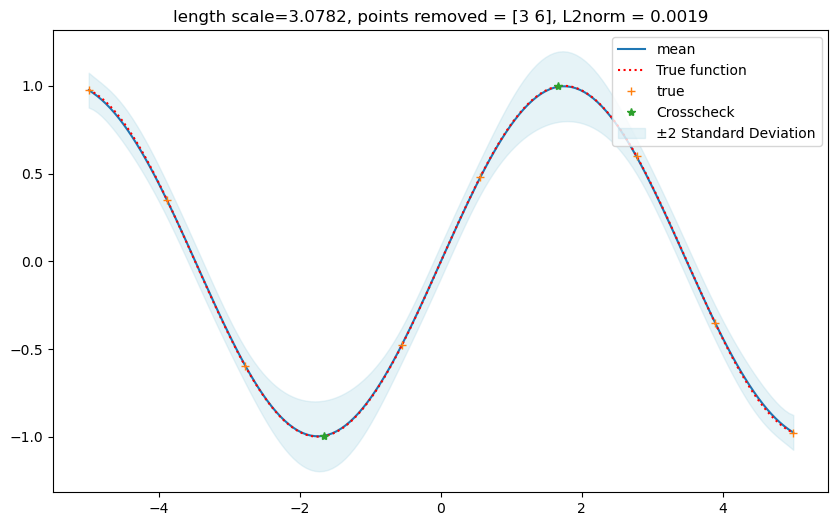

In [60]:
xtest,xtrain,xcheck,mean,std = SanityCheck2(l,Nobs,Ncheck,pair)
plt.figure(figsize=(10, 6))
plt.plot(xtest,mean,label='mean')
plt.plot(xtest, f(xtest), 'r:', label="True function")
plt.plot(xtrain,f(xtrain),'+',label='true')
plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
plt.title(f"length scale={round(l,4)}, points removed = {pair}, L2norm = {round(dist,4)}")
plt.fill_between(xtest,mean - 2 * std,mean + 2 * std,color='lightblue',alpha=0.3,label='±2 Standard Deviation')
plt.legend()

[[-5.        ]
 [-3.88888889]
 [-2.77777778]
 [-0.55555556]
 [ 0.55555556]
 [ 2.77777778]
 [ 3.88888889]
 [ 5.        ]]


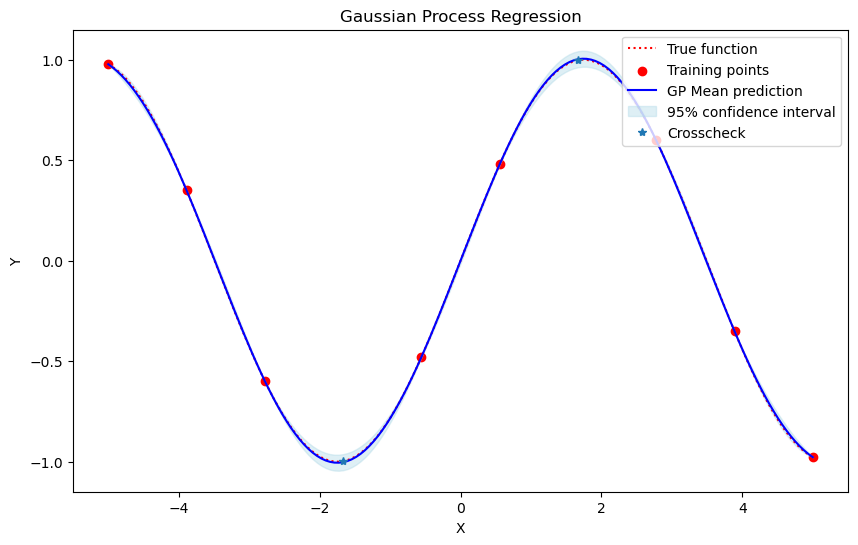

Optimal length scale parameter: 2.1870429828690803


In [70]:
xtest = xtest.reshape(-1,1)
xtrain = xtrain.reshape(-1,1)
print(xtrain)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)#, alpha=0.1**2)
gp.fit(xtrain, f(xtrain))
y_pred, sigma = gp.predict(xtest, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(xtest, f(xtest), 'r:', label="True function")
plt.scatter(xtrain, f(xtrain), c='r', label="Training points")
plt.plot(xtest, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xtest.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.4, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
plt.legend()
plt.show()

optimal_length_scale = gp.kernel_.k2.length_scale
print(f"Optimal length scale parameter: {optimal_length_scale}")

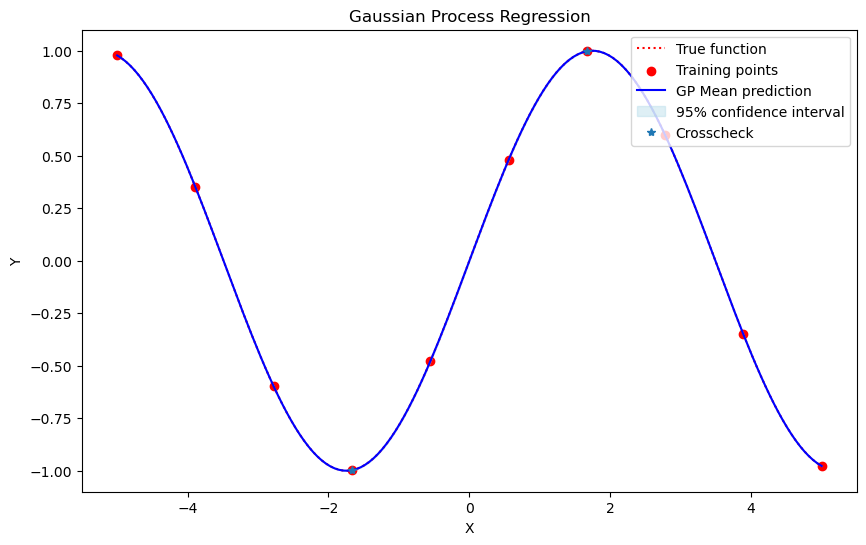

Optimal length scale parameter: 3.2244650876215823


In [72]:
xtrain = np.linspace(-5,5,10).reshape(-1,1)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)#, alpha=0.1**2)
gp.fit(xtrain, f(xtrain))
y_pred, sigma = gp.predict(xtest, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(xtest, f(xtest), 'r:', label="True function")
plt.scatter(xtrain, f(xtrain), c='r', label="Training points")
plt.plot(xtest, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xtest.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.4, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
plt.legend()
plt.show()

optimal_length_scale = gp.kernel_.k2.length_scale
print(f"Optimal length scale parameter: {optimal_length_scale}")